### acc rate

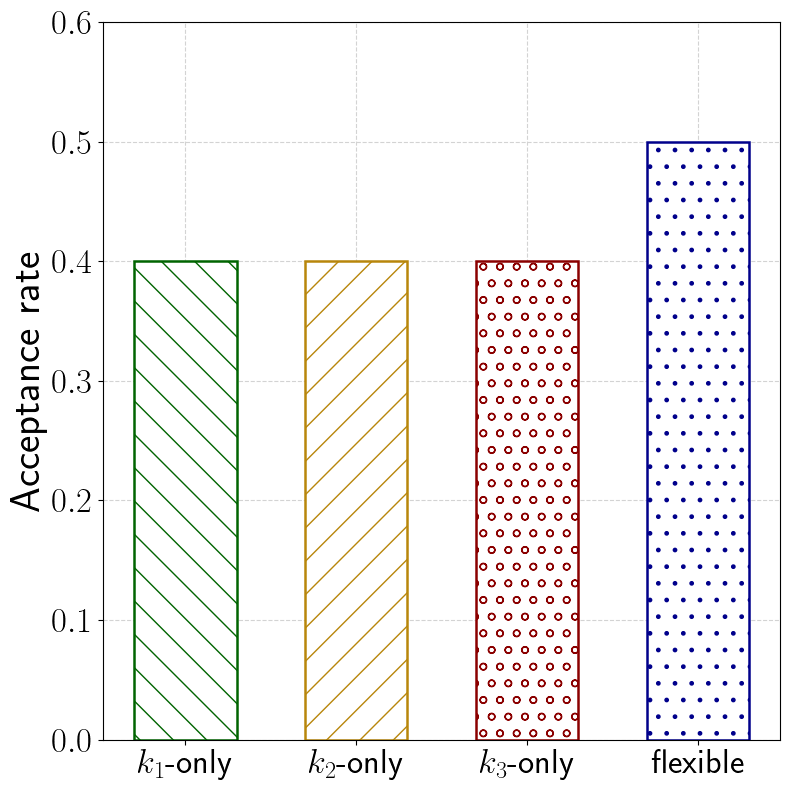

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif')

labelsize, ticksize, legendsize = 30, 30 , 50

# Đọc dữ liệu từ file CSV
df = pd.read_csv("./LNET_R1.csv")

# Tách cột 'setname' để lấy tên mạng và cấu hình (C1, C3, C13)
df['network'] = df['setname'].apply(lambda x: x.split('_')[1])
df['config'] = df['setname'].apply(lambda x: x.split('_')[0])  # Lấy C1, C3, C5, C135

# Chuyển tên các phương pháp thành định dạng bạn mong muốn
df['method'] = df['solvername'].replace({
    "ILP_GUROBI"   : "ILP"
})

# Lọc dữ liệu chỉ cho ILP
df = df[df['method'] == 'ILP']

# Danh sách các mạng và cấu hình
networks = [ "ABI"]
configs = ["C1", 
           "C3", 
           "C5",
        #    "C13",
           "Flexible"]  
networks_x_axis = [ "abilene"]

# Màu sắc cho từng cấu hình
edge_colors = {"C1": "darkgreen", 
               "C3": "darkgoldenrod",
               "C5": "darkred",
            #    "C13": "darkblue",
               "Flexible": "darkblue"}  # Đổi C135 thành Flexible

hatches = {"C1": "\\", "C3": "/", "C5" : "o","C13":" ","Flexible": "."}  

# Tạo hình vẽ
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_size_inches(8, 8)

# Trục x = số lượng configs
x = np.arange(len(configs))
width = 0.6   # mỗi config là một bar riêng, không phải grouped bar nữa

obj_values_all = []

for config in configs:
    config_data = df[df['config'] == config.replace("Flexible", "C135")]  

    # Vì chỉ có 1 network: ABI
    obj_val = config_data[config_data['network'] == "ABI"]['objvalue'].sum()

    obj_val /= 10   # dùng đúng chia 10 như trước
    obj_values_all.append(obj_val)

# Tên hiển thị LaTeX cho trục x
config_labels = [
    r'$k_1$-only',
    r'$k_2$-only',
    r'$k_3$-only',
    # r'$k_{12}$',
    r'flexible'
]
configs_x_axis = ["$k_1$-only", "$k_2$-only", "$k_3$-only", "flexible"]

# Màu sắc / hatch cho từng bar
colors = [edge_colors[c] for c in configs]
hatches_list = [hatches[c] for c in configs]

# Vẽ bar từng config
for i, (val, color, ht) in enumerate(zip(obj_values_all, colors, hatches_list)):
    ax.bar(x[i], val, width, color="w", edgecolor=color, hatch=ht, linewidth=1.8)

# Trục Y
ax.set_ylabel(r'Acceptance rate', fontsize=labelsize)
plt.tick_params(axis='y', labelsize=25)

# Trục X
ax.set_xticks(x)
# ax.set_xticklabels(config_labels, fontsize=ticksize)
ax.set_xticklabels([label for label in configs_x_axis], fontsize=25)
# Giới hạn, grid
ax.set_ylim([0, 0.6])
ax.set_axisbelow(True)
plt.grid(color='lightgrey', linestyle='--', zorder=0)

# Legend (tên ILP)
# ax.legend([r'\texttt{ILP}'], fontsize=legendsize, loc='upper right')

plt.tight_layout()
plt.savefig("./ABI_compare.pdf", dpi=600, bbox_inches='tight')
plt.show()


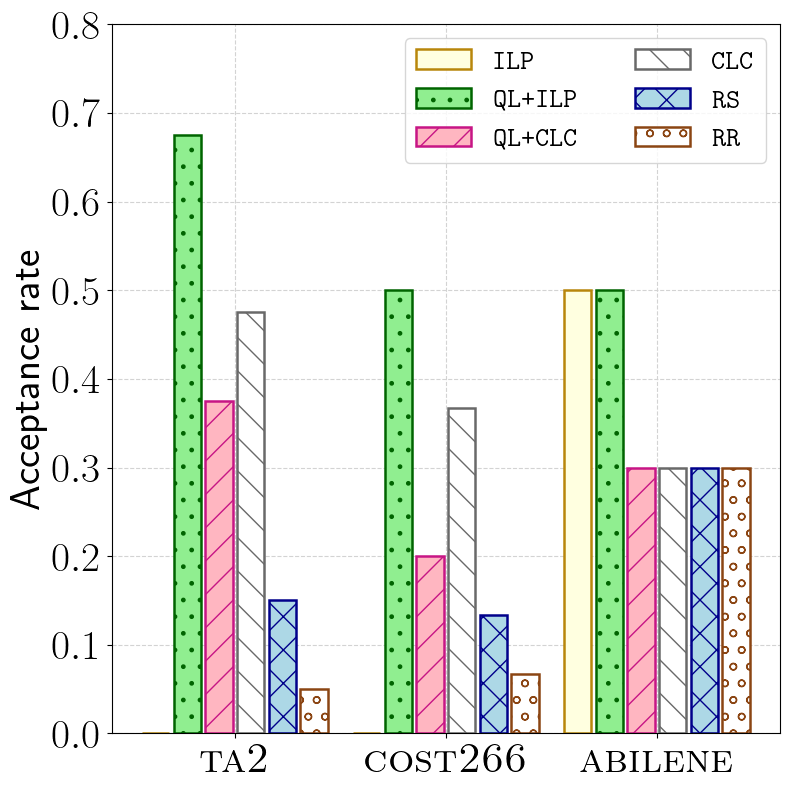

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif')

labelsize, ticksize, legendsize = 30, 30, 20

# Đọc dữ liệu từ file CSV
df = pd.read_csv("./LNET_R1.csv")

# Tách cột 'setname' để lấy tên mạng
df['network'] = df['setname'].apply(lambda x: x.split('_')[1])

# Chuyển tên các phương pháp thành định dạng mong muốn
df['method'] = df['solvername'].replace({
    "ILP_GUROBI": "ILP",
    "QL_ILP": "QL+ILP",
    "QL_CLC": "QL+CLC",
    "GREEDY": "CLC",
    "GREEDY_RS": "RS",
    "GREEDY_RR": "RR"
})

# Chỉ lấy dữ liệu C135
df = df[df['setname'].str.startswith("C135")]

# Danh sách các mạng và phương pháp
networks = ["TA2", "COS","ABI"]
networks_x_axis = ["ta2", "cost266", "abilene"]
methods = ["ILP", "QL+ILP", "QL+CLC", "CLC", "RS", "RR"]

# Màu sắc và hatch cho từng phương pháp
colors_edge = {
    "ILP": "darkgoldenrod",
    "QL+ILP": "darkgreen",
    "QL+CLC": "mediumvioletred",
    "CLC": "dimgray",
    "RR": "saddlebrown",
    "RS": "darkblue"
}

colors = {
    "ILP": "lightyellow",
    "QL+ILP": "lightgreen",
    "QL+CLC": "lightpink",
    "CLC": "w",
    "RR": "w",
    "RS": "lightblue"
}

hatches = {"ILP": "", "QL+ILP": ".", "CLC": "\\", "QL+CLC": "/", "RR": "o", "RS": "x"}

# Tạo hình vẽ
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_size_inches(8, 8)
width = 0.13
x = np.arange(len(networks))

# Vẽ biểu đồ
for i, method in enumerate(methods):
    method_data = df[df['method'] == method]

    total_acceptance = []
    for network in networks:
        data_network = method_data[method_data['network'] == network]

        if network == "TA2":
            divisor = 40
        elif network == "COS":
            divisor = 30
        else:
            divisor = 10

        total = data_network['objvalue'].sum() / divisor if not data_network.empty else 0
        total_acceptance.append(total)

    ax.bar(
        x + i * (width + 0.02),
        total_acceptance,
        width,
        label=rf'\texttt{{{method}}}',
        color=colors[method],
        edgecolor=colors_edge[method],
        hatch=hatches[method],
        linewidth=1.8
    )

# Label & settings
ax.set_axisbelow(True)
ax.set_ylim([0, 0.8])
plt.grid(color='lightgrey', linestyle='--', zorder=0)

ax.set_ylabel(r'Acceptance rate', fontsize=labelsize)
ax.set_xticks(x + width * 2.9)
ax.set_xticklabels([rf'\textsc{{{net}}}' for net in networks_x_axis])

plt.tick_params(axis='x', labelsize=ticksize)
plt.tick_params(axis='y', labelsize=ticksize)

ax.legend(fontsize=legendsize, loc='upper right', ncols=2)

plt.tight_layout()
plt.savefig("./AccRate-R1.pdf", dpi=600, bbox_inches='tight')
plt.show()


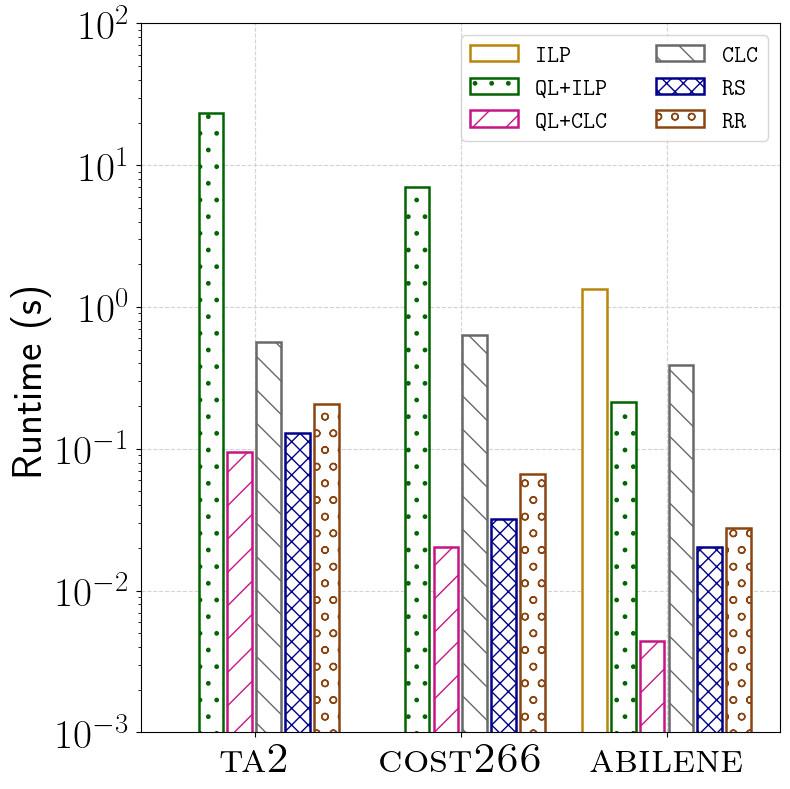

In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif')

labelsize, ticksize, legendsize = 30, 30, 17

# Đọc dữ liệu từ file CSV
df = pd.read_csv("./LNET_R1.csv")

df = df[df['setname'].str.contains("C135")]
# Tách cột 'setname' để lấy tên mạng
df['network'] = df['setname'].apply(lambda x: x.split('_')[1])

# Chuyển tên các phương pháp thành định dạng bạn mong muốn
df['method'] = df['solvername'].replace({
    "ILP_GUROBI": "ILP",
    "QL_ILP": "QL+ILP",
    "QL_CLC": "QL+CLC",
    "GREEDY": "CLC",
    "GREEDY_RR": "RR",
    "GREEDY_RS": "RS"
})

# Danh sách các mạng và phương pháp
networks = ["TA2", "COS","ABI"]
networks_x_axis = ["ta2", "cost266","abilene"]
methods = ["ILP", "QL+ILP", "QL+CLC", "CLC", "RS", "RR"]

# Màu sắc và hatch cho từng phương pháp
colors_edge = {
    "ILP": "darkgoldenrod",
    "QL+ILP": "darkgreen",
    "QL+CLC": "mediumvioletred",
    "CLC": "dimgray",
    "RR": "saddlebrown",
    "RS": "darkblue"
}

hatches = {"ILP": "", "QL+ILP": ".", "CLC": "\\", "QL+CLC": "/", "RR": "o", "RS": "xx"}


# Tạo hình vẽ
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_size_inches(8, 8)
width = 0.12  # Độ rộng của mỗi thanh

# Tọa độ x cho mỗi mạng và phương pháp
x = np.arange(len(networks))

# Vẽ biểu đồ cho từng phương pháp
for i, method in enumerate(methods):
    method_data = df[df['method'] == method]
    runtime_value = [method_data[method_data['network'] == network]['runtime'].sum() for network in networks]

    
    ax.bar(x + i * (width+0.02), runtime_value, width, label=rf'\texttt{{{method}}}', color="w", 
           edgecolor=colors_edge[method], hatch=hatches[method], linewidth=1.8)

# Cài đặt nhãn và tiêu đề

ax.set_ylim(10**-3, 10**2)
ax.set_yscale("symlog")

ax.set_axisbelow(True)
plt.grid(color='lightgrey', linestyle='--', zorder=0)
# ax.set_xlabel(r'Networks', fontsize=labelsize)
ax.set_ylabel(r'Runtime (s)', fontsize=labelsize)
ax.set_yscale("log")
ax.set_xticks(x + width * 2.95)
ax.set_xticklabels([r'\textsc{' + network + '}' for network in networks_x_axis], fontsize=12)   

plt.tick_params(axis='x', labelsize=ticksize)  # Change xtick labels size
plt.tick_params(axis='y', labelsize=ticksize)  # Change ytick labels size


ax.legend(fontsize=legendsize, loc='upper right', ncol=2)

# Lưu biểu đồ dưới dạng file ảnh
plt.tight_layout()
plt.savefig("./Runtime_R1.pdf", dpi=600, bbox_inches='tight')  


plt.show()


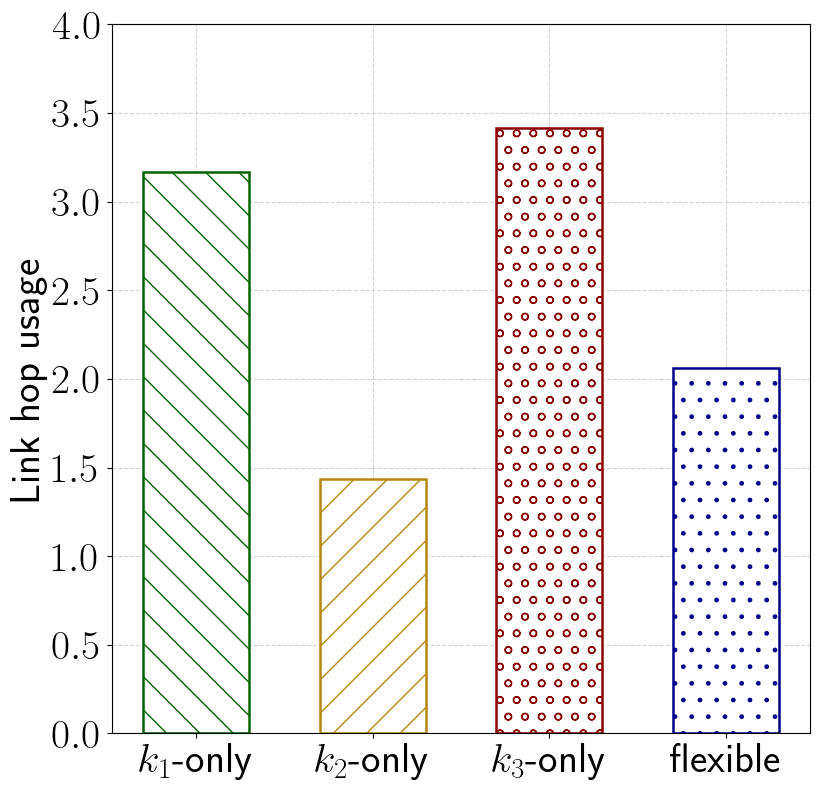

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams['text.usetex'] = True
plt.rc('font', family='sans-serif')

labelsize, ticksize, legendsize = 30, 30, 25

# Đọc dữ liệu từ file CSV
df = pd.read_csv("./LNET_Linkhop.csv")

# Tách cột 'setname' để lấy tên mạng và cấu hình (C1, C3, C13)
df['network'] = df['setname'].apply(lambda x: x.split('_')[1])
df['config'] = df['setname'].apply(lambda x: x.split('_')[0])  # Lấy C1, C3, C13

# Chuyển tên các phương pháp thành định dạng mong muốn
df['method'] = df['solvername'].replace({
    "ILP_GUROBI": "ILP"
})

# Lọc dữ liệu chỉ cho ILP
df = df[df['method'] == 'ILP']

# Cấu hình trục x
configs_x_axis = ["$k_1$-only", "$k_2$-only", "$k_3$-only", "flexible"]  # Nhãn trên trục x
x = np.arange(len(configs_x_axis))  # Tọa độ x cho 3 cột

# Màu sắc và pattern
edge_colors = {"C1": "darkgreen", 
               "C3": "darkgoldenrod",
               "C5": "darkred",
            #    "C13": "darkblue",
               "Flexible": "darkblue"}
colors      = {"C1": "lightgreen", "C3": "lightyellow", "C5": "darkgoldenrod", "Flexible": "lightblue"}
hatches = {"C1": "\\", "C3": "/", "C5" : "o","Flexible": "."}

# Tạo hình vẽ
fig, ax = plt.subplots(figsize=(8, 8))
fig.set_size_inches(8, 8)
width = 0.6  # Độ rộng của mỗi cột

# Duyệt qua từng cấu hình để lấy giá trị
hop_values = []
for config in ["C1", "C3", "C5", "Flexible"]:
    config_real = config.replace("Flexible", "C135")  # Flexible = C135
    config_data = df[df['config'] == config_real]

    hop_val = config_data['nhops'].mean()   # <-- dùng nhops, không phải objvalue
    hop_values.append(hop_val)

# Vẽ từng cột tương ứng với k1, k2, flexible
for i, config in enumerate(["C1", "C3", "C5", "Flexible"]):
    ax.bar(x[i], hop_values[i], width,
           label=r'\texttt{ILP}' if i == 0 else "",
           color="w",
           edgecolor=edge_colors[config],
           hatch=hatches[config],
           linewidth=1.8)
ax.set_ylim([0,4])

# Cài đặt trục x
ax.set_axisbelow(True)
ax.set_xticks(x)
# ax.set_ylim(ylim)
ax.set_xticklabels([label for label in configs_x_axis], fontsize=25)
# ax.set_xlabel(r'Configurations', fontsize=25)
ax.set_ylabel(r'Link hop usage', fontsize=labelsize)
# ax.legend(fontsize=legendsize, loc='lower right')

plt.tick_params(axis='x', labelsize=ticksize)
plt.tick_params(axis='y', labelsize=ticksize)
plt.grid(color='lightgrey', linestyle='--', zorder=0)
plt.tight_layout()

plt.savefig("./ABI_hop.pdf", dpi=600, bbox_inches='tight')

plt.show()


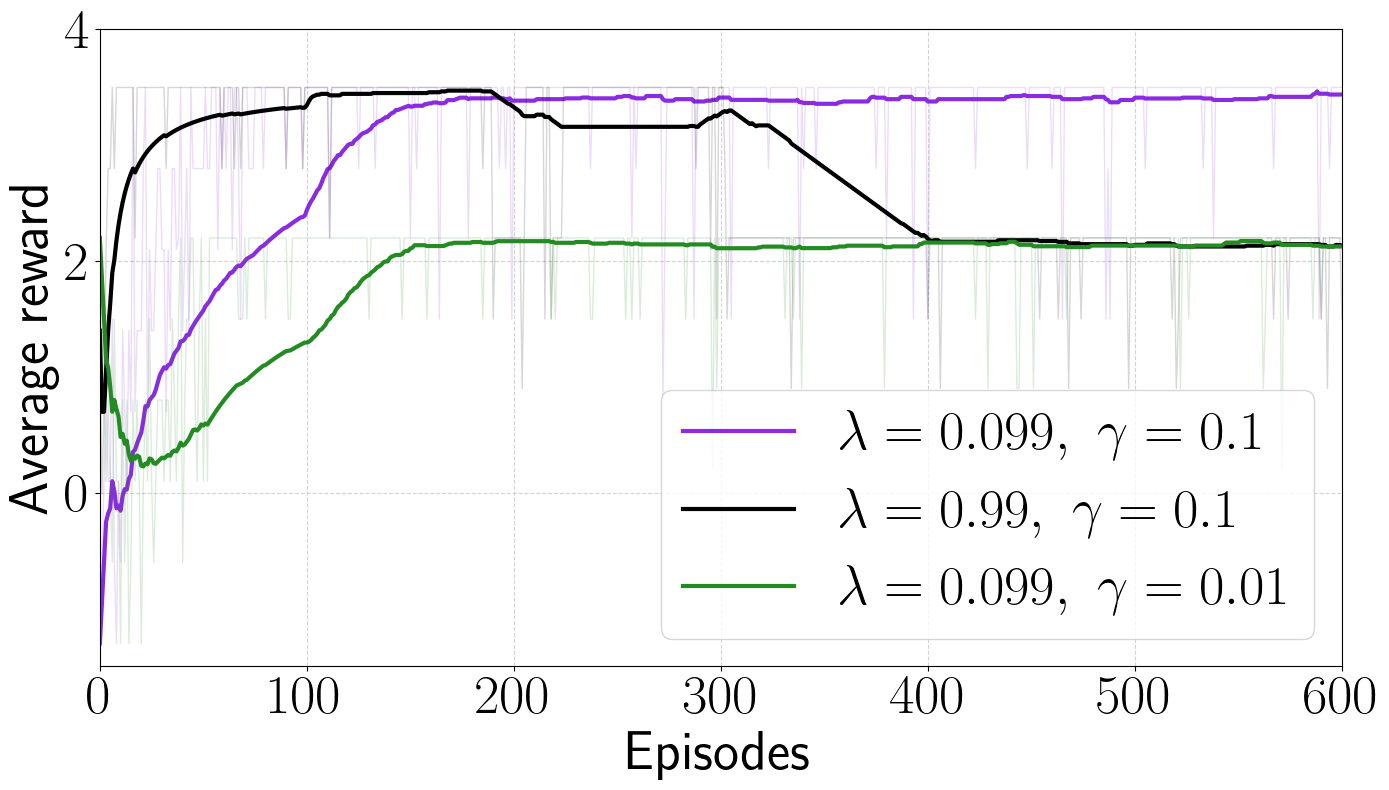

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Bật chế độ LaTeX
plt.rcParams["text.usetex"] = True
plt.rc('font', family='sans-serif')

labelsize, ticksize, legendsize = 40,40,40

# Đọc dữ liệu từ tệp CSV
file_paths = [
    "./reward_0.099_0.1.csv", #chọn
    "./reward_0.99_0.1.csv",
    "./reward_0.099_0.01.csv",
]

# Legend LaTeX format
legend_labels = [
    r"$\lambda = 0.099,\ \gamma = 0.1$",
    r"$\lambda = 0.99,\ \gamma = 0.1$",
    r"$\lambda = 0.099,\ \gamma = 0.01$",
]

# Tạo figure
plt.figure(figsize=(14, 8))
colors = ["blueviolet", 
          "black", 
          "forestgreen"]
window_size = 100



for idx, file_path in enumerate(file_paths):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()

    # Tìm cột reward duy nhất trong file
    reward_col = [col for col in df.columns if "reward" in col][0]

    df[reward_col] = pd.to_numeric(df[reward_col], errors="coerce")
    df[f"{reward_col}_mean"] = df[reward_col].rolling(window=window_size, min_periods=1).mean()

    plt.plot(
        df["ep"],
        df[f"{reward_col}_mean"],
        label=legend_labels[idx],
        color=colors[idx],
        linewidth=3
    )
    plt.plot(
        df["ep"],
        df[reward_col],
        color=colors[idx],
        alpha=0.16,
        linewidth=1
    )

# Cấu hình trục và nhãn
plt.xlabel("Episodes", fontsize=labelsize)
plt.ylabel("Average reward", fontsize=labelsize)
plt.tick_params(axis='x', labelsize=ticksize)
plt.tick_params(axis='y', labelsize=ticksize)
plt.xlim(0, 600)
plt.xticks([0, 100, 200, 300, 400, 500, 600])
plt.ylim(-1.5, 4)

# plt.tick_params(axis='x', labelsize=ticksize)
# plt.tick_params(axis='y', labelsize=ticksize)
plt.grid(color='lightgrey', linestyle='--', zorder=0)


plt.legend(fontsize=legendsize, loc='lower right', ncol=1)
plt.tight_layout()

plt.savefig("./reward_abi.pdf", bbox_inches='tight',dpi=600)
plt.show()
